In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
A=pd.read_csv('housing.csv',index_col=0)
A.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


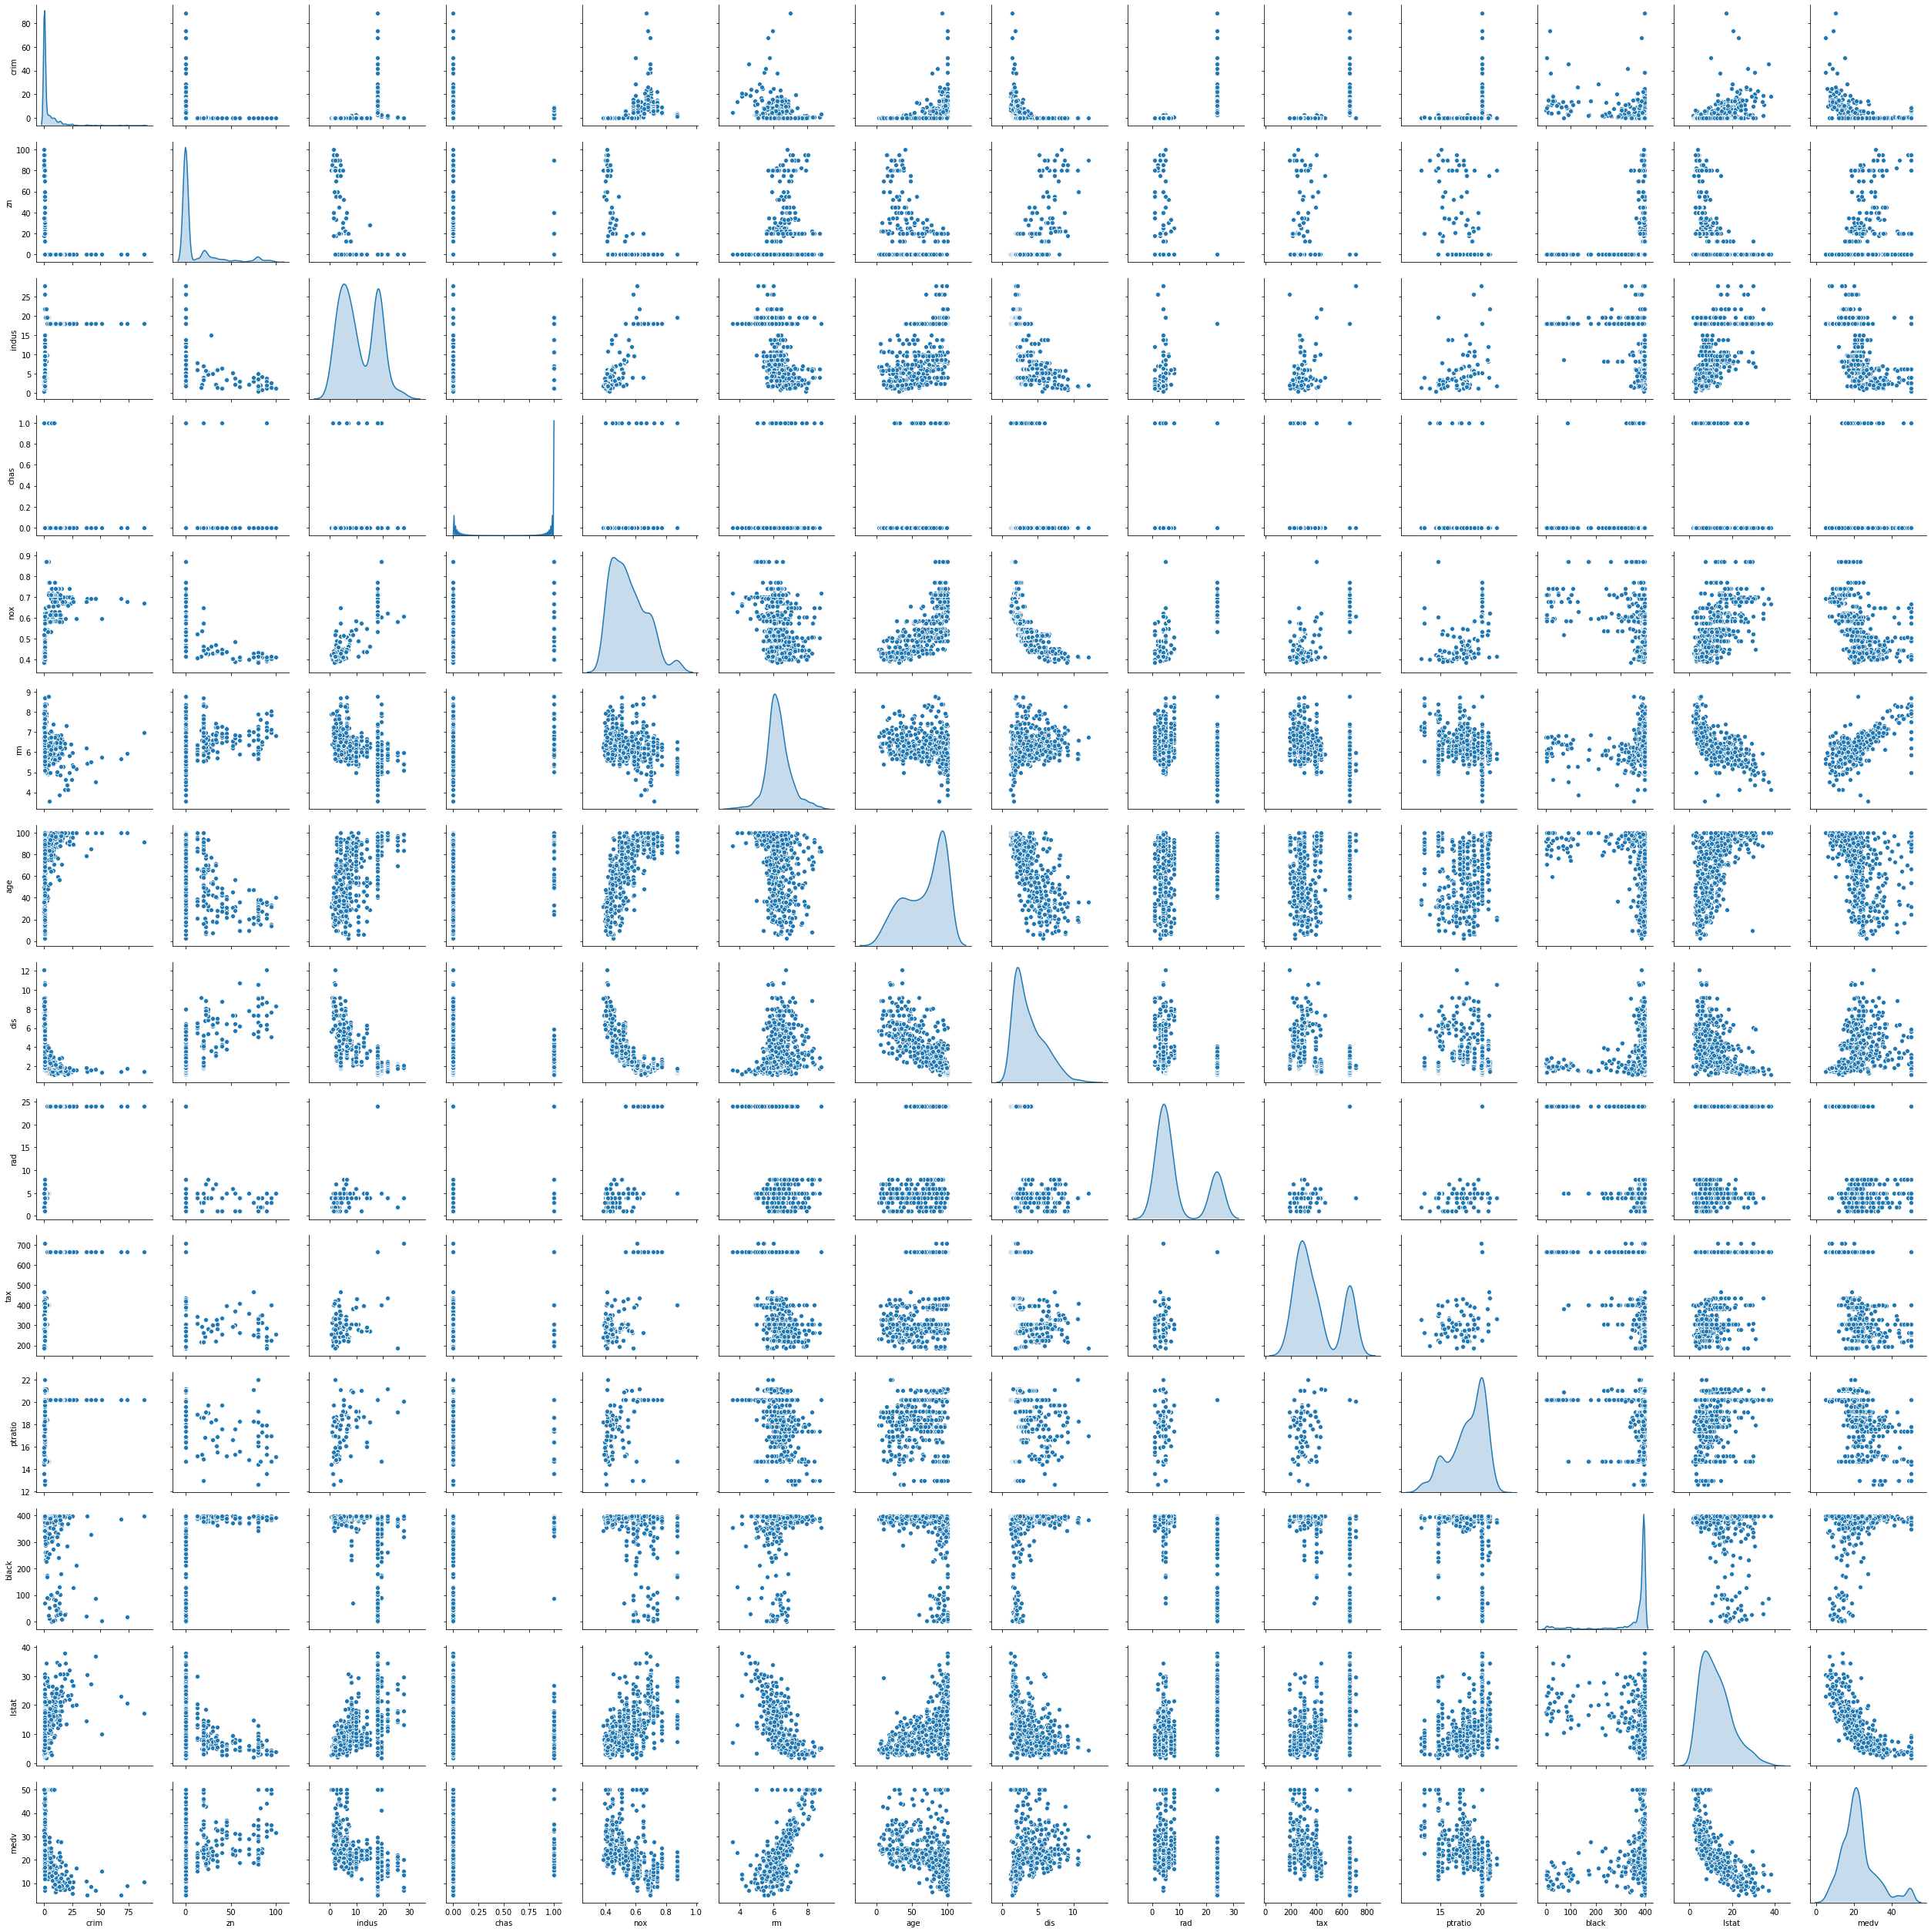

In [3]:
sns.pairplot(A,diag_kind='kde')

In [4]:
A.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [5]:
import statsmodels.api as sm

In [6]:
x=A.drop(['medv'],axis=1)
Y=A['medv']

In [7]:
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(x)
x_std.shape

(506, 13)

In [8]:
cov_matrix = np.cov(x_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.0019802  -0.20086619  0.40738853 -0.05600226  0.42180532 -0.21968085
   0.35343273 -0.38042191  0.62674377  0.5839183   0.29051973 -0.38582644
   0.4565237 ]
 [-0.20086619  1.0019802  -0.53488527 -0.04278127 -0.51762669  0.31260839
  -0.57066514  0.66572388 -0.31256554 -0.31518622 -0.39245415  0.17586788
  -0.41381239]
 [ 0.40738853 -0.53488527  1.0019802   0.06306266  0.76516363 -0.39245145
   0.6460553  -0.70942902  0.59630775  0.72218743  0.38400646 -0.35768342
   0.60499536]
 [-0.05600226 -0.04278127  0.06306266  1.0019802   0.09138341  0.09143192
   0.0866891  -0.09937217 -0.00738283 -0.03565699 -0.1217558   0.0488851
  -0.05403609]
 [ 0.42180532 -0.51762669  0.76516363  0.09138341  1.0019802  -0.30278658
   0.73291856 -0.77075334  0.61265134  0.66934602  0.1893068  -0.38080321
   0.59204898]
 [-0.21968085  0.31260839 -0.39245145  0.09143192 -0.30278658  1.0019802
  -0.2407407   0.20565264 -0.21026221 -0.29262615 -0.35620546  0.12832224
  -0.61502373]
 [

In [9]:
cov_matrix.shape

(13, 13)

In [10]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print(np.abs(eig_vals))

[6.1389812  1.43611329 1.2450773  0.85927328 0.83646904 0.65870897
 0.5364162  0.39688167 0.06363502 0.27749173 0.16963823 0.18638271
 0.22067394]


In [11]:
eig_vals=np.abs(eig_vals)
eig_vecs=np.abs(eig_vecs)



In [12]:
eig_vecs

array([[0.2509514 , 0.31525237, 0.24656649, 0.06177071, 0.08215692,
        0.21965961, 0.77760721, 0.15335048, 0.0459523 , 0.26039028,
        0.08676107, 0.10964435, 0.01936913],
       [0.25631454, 0.3233129 , 0.29585782, 0.12871159, 0.32061699,
        0.3233881 , 0.27499628, 0.40268031, 0.08091897, 0.35813749,
        0.07142528, 0.26275629, 0.26752723],
       [0.34667207, 0.11249291, 0.01594592, 0.01714571, 0.00781119,
        0.0761379 , 0.33957645, 0.17393172, 0.25107654, 0.64441615,
        0.11319963, 0.30316943, 0.36353226],
       [0.00504243, 0.45482914, 0.28978082, 0.81594136, 0.08653094,
        0.16749014, 0.07413621, 0.02466215, 0.03592171, 0.01372777,
        0.00398268, 0.01392667, 0.00618184],
       [0.34285231, 0.21911553, 0.12096411, 0.12822614, 0.13685356,
        0.15298267, 0.19963484, 0.08012056, 0.04363045, 0.01852201,
        0.80432257, 0.11131888, 0.23105645],
       [0.18924257, 0.14933154, 0.59396117, 0.28059184, 0.4234472 ,
        0.05926707, 0.06393

In [13]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]
eigen_pairs

[(6.138981200359456,
  array([0.2509514 , 0.25631454, 0.34667207, 0.00504243, 0.34285231,
         0.18924257, 0.3136706 , 0.32154387, 0.31979277, 0.33846915,
         0.20494226, 0.20297261, 0.30975984])),
 (1.436113290745227,
  array([0.31525237, 0.3233129 , 0.11249291, 0.45482914, 0.21911553,
         0.14933154, 0.31197778, 0.34907   , 0.27152094, 0.23945365,
         0.30589695, 0.23855944, 0.07432203])),
 (1.2450773001163116,
  array([0.24656649, 0.29585782, 0.01594592, 0.28978082, 0.12096411,
         0.59396117, 0.01767481, 0.04973627, 0.28725483, 0.22074447,
         0.32344627, 0.3001459 , 0.26700025])),
 (0.8592732766396071,
  array([0.06177071, 0.12871159, 0.01714571, 0.81594136, 0.12822614,
         0.28059184, 0.17520603, 0.21543585, 0.13234996, 0.10333509,
         0.28262198, 0.1684985 , 0.06941441])),
 (0.8364690376427635,
  array([0.08215692, 0.32061699, 0.00781119, 0.08653094, 0.13685356,
         0.4234472 , 0.01669085, 0.09859225, 0.20413162, 0.13046057,
         0

In [14]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 47.12960636  58.1547996   67.7133894   74.310121    80.73178205
  85.78876032  89.90688406  92.95378648  95.08411979  96.7782569
  98.20913665  99.51146723 100.        ]


In [15]:
eig_vecs[:,0]

array([0.2509514 , 0.25631454, 0.34667207, 0.00504243, 0.34285231,
       0.18924257, 0.3136706 , 0.32154387, 0.31979277, 0.33846915,
       0.20494226, 0.20297261, 0.30975984])

In [16]:
eigvec = np.array(eig_vecs[:,:10])
x_pca = np.dot(x_std,eigvec)
x_pca.shape


(506, 10)

In [17]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [18]:
xc=sm.add_constant(x)
model=sm.OLS(Y,xc).fit()

In [19]:
cols=x.columns

In [20]:
p = pd.Series(model.pvalues.values[1:],index = cols)   
p

crim       1.086810e-03
zn         7.781097e-04
indus      7.382881e-01
chas       1.925030e-03
nox        4.245644e-06
rm         1.979441e-18
age        9.582293e-01
dis        6.013491e-13
rad        5.070529e-06
tax        1.111637e-03
ptratio    1.308835e-12
black      5.728592e-04
lstat      7.776912e-23
dtype: float64

In [21]:
A.shape

(506, 14)

In [22]:
m1=smf.ols('medv~crim+zn+chas+black+nox+rm+dis+rad+tax+ptratio+lstat',A).fit()

In [23]:
m1.pvalues

Intercept    2.727265e-12
crim         1.010438e-03
zn           7.542759e-04
chas         1.551469e-03
black        5.565743e-04
nox          1.209413e-06
rm           2.889779e-19
dis          6.837043e-15
rad          2.996799e-06
tax          5.214237e-04
ptratio      9.235063e-13
lstat        2.140586e-25
dtype: float64

In [24]:
x.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [25]:
#Feature selection by recursive backward elimination
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = x[cols]
    xc = sm.add_constant(X)
    model = sm.OLS(Y,xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['crim', 'zn', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']


In [26]:
#Method-2 using RFE Package
from sklearn.feature_selection import RFE
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,Y)  
#Fitting the data to model
model.fit(X_rfe,Y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True False  True  True False  True False
  True]
[1 1 1 1 1 1 4 1 1 2 1 3 1]


In [27]:
X_final=A[selected_features_BE]
X_final.shape

(506, 11)

In [28]:
X_final.head()

,crim,zn,chas,nox,rm,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,0,0.538,6.575,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,0,0.469,6.421,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,0,0.469,7.185,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,0,0.458,6.998,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,0,0.458,7.147,6.0622,3,222,18.7,396.90,5.33


In [29]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score,KFold

In [30]:
RF_ve=[]
RF_be=[]
for i in np.arange(1,100):
  RF=RandomForestRegressor(n_estimators=i,random_state=0)
  kfold = KFold(shuffle=True,n_splits=5,random_state=0)
  mse=cross_val_score(RF,x,Y,cv=kfold,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(mse))
  RF_be.append(np.mean(rmse))
  RF_ve.append(np.std(rmse,ddof=1))

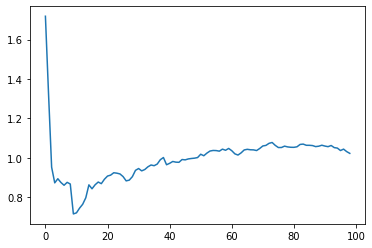

In [31]:
X_axis=np.arange(len(RF_ve))
plt.plot(X_axis,RF_ve)

In [32]:
np.argmin(RF_ve)

9

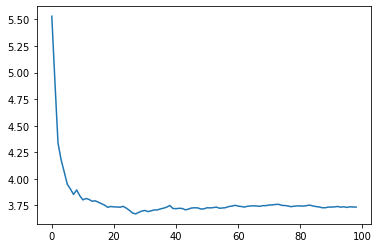

In [33]:
X_axis=np.arange(len(RF_be))
plt.plot(X_axis,RF_be)

In [34]:
np.argmin(RF_be),np.min(RF_be)

(27, 3.6705078193203255)

In [35]:
AB_be=[]
for i in np.arange(1,100):
  AB=AdaBoostRegressor(n_estimators=i,random_state=0)
  kfold = KFold(shuffle=True,n_splits=5,random_state=0)
  mse=cross_val_score(AB,X_final,Y,cv=kfold,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(mse))
  AB_be.append(np.mean(rmse))


In [36]:
np.min(AB_be),np.argmin(AB_be)

(3.990536448672595, 9)

In [38]:
LR = LinearRegression()

In [39]:
ABLR_be=[]
for i in np.arange(1,100):
  ABLR=AdaBoostRegressor(base_estimator=LR,n_estimators=i,random_state=0)
  kfold = KFold(shuffle=True,n_splits=5,random_state=0)
  mse=cross_val_score(ABLR,X_final,Y,cv=kfold,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(mse))
  ABLR_be.append(np.mean(rmse))


In [40]:
np.min(ABLR_be),np.argmin(ABLR_be)

(4.943940733090498, 0)

In [41]:
RF_ve=[]
for i in np.arange(1,100):
  RF=RandomForestRegressor(criterion='mse',n_estimators=i,random_state=0)
  kfold = KFold(shuffle=True,n_splits=5,random_state=0)
  mse=cross_val_score(RF,X_final,Y,cv=kfold,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(mse))
  RF_ve.append(np.std(rmse,ddof=1))

In [42]:
np.min(RF_ve),np.argmin(RF_ve)

(0.7695504589796142, 9)

In [43]:
X_final.shape

(506, 11)

In [44]:
X_final.head()

,crim,zn,chas,nox,rm,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,0,0.538,6.575,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,0,0.469,6.421,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,0,0.469,7.185,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,0,0.458,6.998,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,0,0.458,7.147,6.0622,3,222,18.7,396.90,5.33


In [45]:
x.shape

(506, 13)

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor

In [47]:
knn_be=[]
for i in np.arange(1,100):
  knn=KNeighborsRegressor(n_neighbors=i,metric='euclidean',weights='distance')
  kfold = KFold(shuffle=True,n_splits=5,random_state=0)
  mse=cross_val_score(knn,x_std,Y,cv=kfold,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(mse))
  knn_be.append(np.mean(rmse))

In [48]:
knn_bag_be=[]
for i in np.arange(1,100):
  knn_bag=BaggingRegressor(n_estimators=i,random_state=0)
  kfold = KFold(shuffle=True,n_splits=5,random_state=0)
  mse=cross_val_score(knn_bag,x_std,Y,cv=kfold,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(mse))
  knn_bag_be.append(np.mean(rmse))

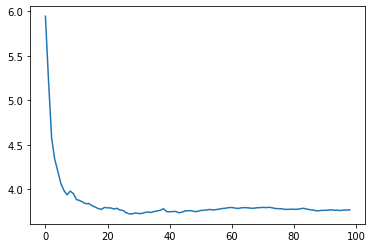

In [50]:
X_axis=np.arange(len(knn_bag_be))
plt.plot(X_axis,knn_bag_be)

In [52]:
np.min(knn_bag_be),np.argmin(knn_bag_be)

(3.72475338401534, 27)

In [53]:
np.min(knn_be),np.argmin(knn_be)

(4.01449499456682, 2)

In [54]:
LR=LinearRegression()
RF1=RandomForestRegressor(criterion='mse',n_estimators=10,random_state=0)
RF2=RandomForestRegressor(criterion='mse',n_estimators=28,random_state=0)
KNN=KNeighborsRegressor(n_neighbors=3,metric='euclidean',weights='distance')
knn_bag=BaggingRegressor(base_estimator=KNN,n_estimators=4,random_state=0)
dt_bag=BaggingRegressor(n_estimators=11,random_state=0)
Rf_boost=AdaBoostRegressor(base_estimator=RF1,n_estimators=50,random_state=0)



In [55]:
models = []
models.append(('LinearRegression', LR))
models.append(('RF_with_best_VE',RF1))
models.append(('RF_with_best_BE',RF2))
models.append(('KNN',KNN))
models.append(('BaggedKNN',knn_bag))
models.append(('BaggedDT',dt_bag))
models.append(('BoostedRF',Rf_boost))



LinearRegression: 4.837613 (0.729064)
RF_with_best_VE: 3.843862 (0.715952)
RF_with_best_BE: 3.670067 (0.888273)
KNN: 4.014495 (0.882554)
BaggedKNN: 4.110295 (0.758280)
BaggedDT: 3.886142 (0.893570)
BoostedRF: 3.453669 (0.884187)


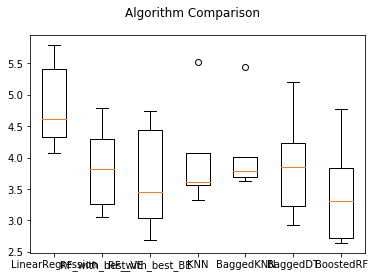

In [56]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = cross_val_score(model, x_std, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [57]:
(4.110295-4.014495)/4.110295

0.023307329522576765

In [58]:
(0.882554-0.758280)/0.882554

0.14081178035564962

In [59]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [60]:
Rd=Ridge(alpha=0.5,normalize=True)
Ls=Lasso(alpha=0.1,normalize=True)
En=ElasticNet(alpha=0.01,l1_ratio=0.919,normalize=True)


In [61]:
from sklearn.model_selection import GridSearchCV
param={'alpha':np.arange(0.01,1,0.01),'l1_ratio':np.arange(0.1,1,0.01)}


In [62]:
GS=GridSearchCV(En,param,cv=5)


In [63]:
GS.fit(x,Y)

GridSearchCV(cv=5,
             estimator=ElasticNet(alpha=0.01, l1_ratio=0.919, normalize=True),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0...
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99])})

In [64]:
GS.best_params_

{'alpha': 0.01, 'l1_ratio': 0.9199999999999996}

In [65]:
models = []
models.append(('Ridge',Rd))
models.append(('Lasso',Ls))
models.append(('Elastic',En))

Ridge: 5.218396 (0.893729)
Lasso: 5.874592 (0.643972)
Elastic: 5.202181 (0.874634)


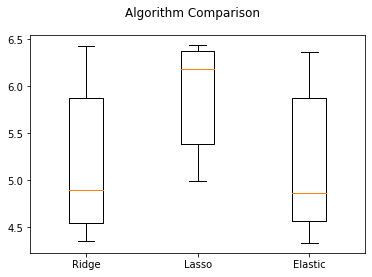

In [66]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = cross_val_score(model, x, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [67]:
from sklearn.preprocessing import PolynomialFeatures

In [68]:
X_QR.head()

NameError: name 'X_QR' is not defined

In [ ]:
X_QR=x[['lstat','ptratio','rm']] #Picking the features with curvilinear/non-linear relationship

In [ ]:
X_QR.shape

In [ ]:
#Quadratic Regression Model
qr=PolynomialFeatures(degree=2)
x_qr=qr.fit_transform(X_QR)


In [ ]:
type(x_qr)

In [ ]:
x_qr_df=pd.DataFrame(x_qr)
x_qr_df.head()

In [ ]:
x_qr_df=x_qr_df.drop(0,axis=1)

In [ ]:
x_qr_df.head()

In [ ]:
x.head()

In [ ]:
x_qr_df.shape

In [ ]:
idx=np.arange(x.shape[0])


In [ ]:
Y.index=idx

In [ ]:
x.index=idx

In [ ]:
x_qr_df=pd.concat([x,x_qr_df,Y],axis=1)

In [ ]:
x_qr_df.shape

In [ ]:
x_qr_df.drop(['lstat','ptratio','rm'],axis=1,inplace=True)

In [ ]:
x_qr_df.head()

In [ ]:
x_qr_df.columns=['crim','zn','indus','chas','nox','age','dis','rad','tax','black','f1','f2','f3','f4','f5','f6','f7','f8','f9','medv']


In [ ]:
m9=smf.ols('medv~crim+zn+indus+chas+nox+age+dis+rad+tax+black+f1+f2+f3+f4+f5+f6+f7+f8+f9',x_qr_df).fit()

In [ ]:
m9.summary()

In [ ]:
x_qr_df.drop(['zn','age','f6','f7'],axis=1,inplace=True)

In [ ]:
X_QR_final=x_qr_df.drop(['medv'],axis=1)
qr=LinearRegression()



In [ ]:
models = []
models.append(('QuadraticRegression', qr))
models.append(('Ridge',Rd))
models.append(('Lasso',Ls))
models.append(('Elastic',En))


In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(shuffle=True,n_splits=5,random_state=0)
	cv_results = cross_val_score(model, X_QR_final, Y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#BE:4.352 , VE:0.768 (with only f1 to f9)
#LR:BE: 4.828,VE:0.702
#QR: BE: 3.952, VE: 0.687